<a href="https://colab.research.google.com/github/sd1214/Cats_vs_Dogs-Classifier/blob/master/final_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tqdm import tqdm

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/dogs_cats')

Mounted at /content/drive


In [0]:
os.listdir()

['test1',
 'train',
 'train_data.npy',
 'test_data.npy',
 'model.h5',
 'submission.csv',
 'model2.h5',
 'submission2.csv']

In [0]:
train_data = np.load('train_data.npy')

In [0]:
test_data = np.load('test_data.npy')

In [0]:
train = train_data[0:24000]
val = train_data[24000:25000]

In [0]:
print(len(train) , len(val))

24000 1000


In [0]:
X = np.array([i[0] for i in train]).reshape(-1,50,50,1)
Y = [i[1] for i in train]

X_test = np.array([i[0] for i in val]).reshape(-1,50,50,1)
Y_test = [i[1] for i in val]

In [0]:
Y = np.asarray(Y)
Y.reshape(len(Y) , 2)

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [0]:
Y_test = np.asarray(Y_test)
Y_test.reshape(len(Y_test) , 2)

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [0]:
from keras.layers import Dense , Activation
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D

Using TensorFlow backend.


In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(96, (3, 3), padding="valid"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding="valid"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2 , activation='sigmoid'))


print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [0]:
batch_size = 128
epochs = 25

In [0]:
import tensorflow.keras.optimizers as optimizers


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
Train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
Train_datagen.fit(X)

In [0]:
Test_datagen = ImageDataGenerator(rescale=1./255)
Test_datagen.fit(X_test)

In [0]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1,epsilon=0.0001, patience=5, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
history = model.fit_generator(Test_datagen.flow(X, Y, batch_size=batch_size),
                    steps_per_epoch=X.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_test, Y_test),
                    epochs = epochs, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
 - 16s - loss: 0.6932 - acc: 0.4973 - val_loss: 0.7283 - val_acc: 0.5040
Epoch 2/25
 - 14s - loss: 0.6932 - acc: 0.4952 - val_loss: 0.7593 - val_acc: 0.5030
Epoch 3/25
 - 13s - loss: 0.6932 - acc: 0.4946 - val_loss: 0.7917 - val_acc: 0.5030
Epoch 4/25
 - 13s - loss: 0.6932 - acc: 0.5009 - val_loss: 0.7915 - val_acc: 0.5030
Epoch 5/25
 - 13s - loss: 0.6932 - acc: 0.4998 - val_loss: 0.7861 - val_acc: 0.5030
Epoch 6/25
 - 13s - loss: 0.6932 - acc: 0.4966 - val_loss: 0.7859 - val_acc: 0.5030

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/25
 - 13s - loss: 0.6932 - acc: 0.4993 - val_loss: 0.7853 - val_acc: 0.5030
Epoch 8/25
 - 13s - loss: 0.6932 - acc: 0.5006 - val_loss: 0.7846 - val_acc: 0.5030
Epoch 9/25
 - 13s - loss: 0.6931 - acc: 0.5006 - val_loss: 0.7849 - val_acc: 0.5030
Epoch 10/25
 - 13s - loss: 0.6932 - acc: 0.4998 - val_loss: 0.7844 - val_acc: 0.5030
Epoch 11/25
 - 13s - loss: 0.

In [0]:
model.save_weights("model3.h5")

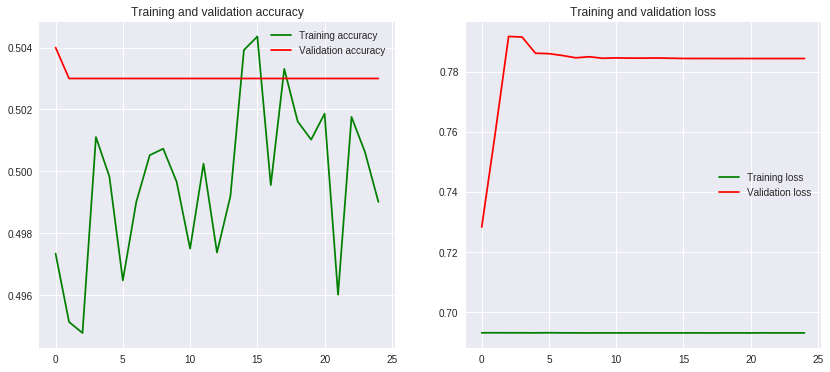

In [0]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.7843308172225952
Validation accuracy: 0.503


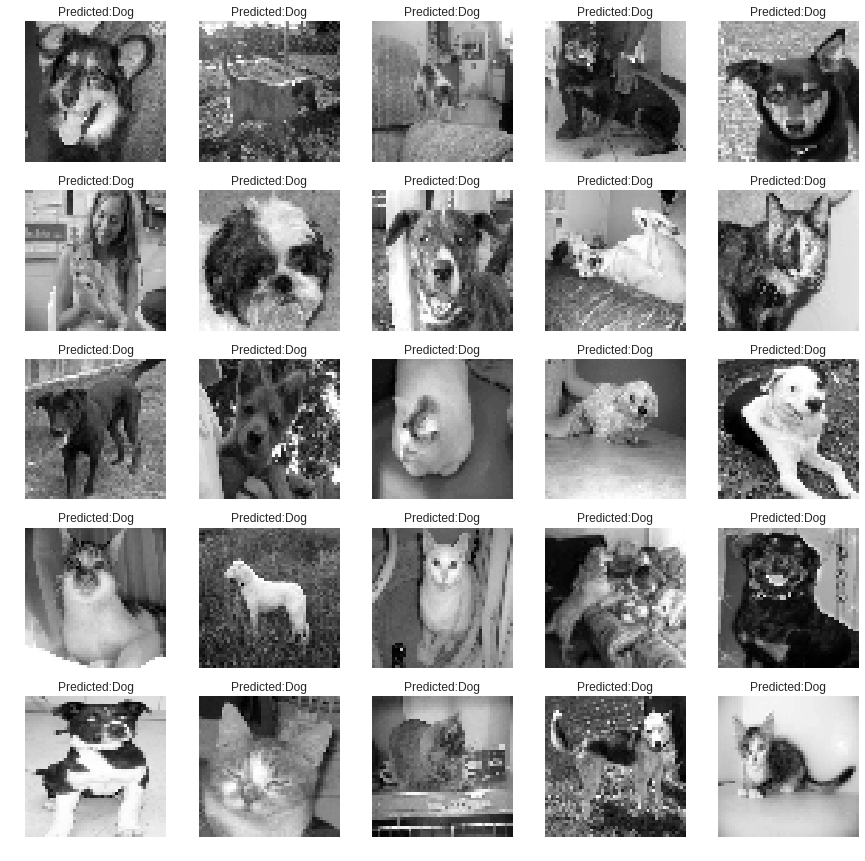

In [0]:
f, ax = plt.subplots(5,5, figsize=(15,15))
for i,data in enumerate(test_data[:25]):
    img_num = data[1]
    img_data = data[0]
    orig = img_data
    data = img_data.reshape(-1,50,50,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: 
        str_predicted='Dog'
    else: 
        str_predicted='Cat'
    ax[i//5, i%5].imshow(orig ,cmap='gray')
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(str_predicted))    
plt.show()


In [0]:
pred_list = []
img_list = []
for img in tqdm(test_data):
    img_data = img[0]
    img_idx = img[1]
    data = img_data.reshape(-1,50,50,1)
    predicted = model.predict([data])[0]
    img_list.append(img_idx)
    pred_list.append(predicted[1])


100%|██████████| 12500/12500 [00:33<00:00, 367.76it/s]


In [0]:
submission = pd.DataFrame({'id':img_list , 'label':pred_list})
submission.head()
submission.to_csv("submission3.csv", index=False)